In [39]:
from path_finder import GreedySearch
from path_finder import BFS
from path_finder import DFS
from path_finder import AStarSearch
from graph_generator import read_input_file
from matplotlib import pyplot as plt
import time
from IPython.display import display
import numpy as np 

%matplotlib notebook

In [40]:
from graph_generator import GraphGenerator

def read_multi_point_input(fpath:str, verbose:bool=False, fill:bool=False):
    """ Read input file with TA Format
    Input:
        fpath: Path to input txt file
        verbose: Print to screen to debug
        fill: Should we fill the polygon
    Output:
        graph: (Numpy array) Matrix to represent graph value
        start: (Tuple of int) Start point
        goal: (Tuple of int) Goal point
    """
    f = open(fpath)
    l = f.readline()
    w, h = [int(x) for x in l.strip().split(',')]

    if verbose:
        print("Read from file....")
        print(f"Width={w}, Height={h}")

    generator = GraphGenerator((h, w), fill=fill)
    
    l = f.readline()
    
    #xStart, yStart, xGoal, yGoal = [int(x) for x in l.strip().split(',')]
    list_coor = l.strip().split(',')
    list_x = list_coor[1::2]
    list_y = list_coor[::2]
    list_x = [int(x) for x in list_x]
    list_y = [int(y) for y in list_y]

    xStart, yStart, xGoal, yGoal = list_x[0], list_y[0], list_x[1], list_y[1]
    list_point = [(list_x[i], list_y[i]) for i in range(2, len(list_x))]
    
    
    if verbose:
        print(f"Start: ({xStart}, {yStart})")
        print(f"Goal: ({xGoal}, {yGoal})")

    num_polygon = int(f.readline().strip())

    if verbose:
        print(f"Found {num_polygon} Polygons")
    for pInd in range(num_polygon):
        l = f.readline()
        point_list = [int(x) for x in l.strip().split(',')]
        polygon = list(zip(point_list[::2], point_list[1::2]))

        generator.add_polygon(polygon)

    f.close()

    if verbose:
        print("Done load input")
        generator.plot_graph()

    return generator.generate_graph(), (xStart, yStart), (xGoal, yGoal), list_point


In [41]:
file_path = "multi_points.txt"
#file_path = "sample_input.txt"
matrix, start, goal, list_point = read_multi_point_input(file_path)
#matrix, start, goal = read_input_file(file_path)

In [42]:
print(list_point)
print(start)
print(goal)

[(5, 1), (2, 8), (9, 8), (19, 3), (2, 20)]
(1, 1)
(19, 20)


In [43]:
from path_finder import AllPointSearch
all_point_finder = AllPointSearch(start, goal, list_point, use_heapq=True, algo_to_find_shortest_point=AStarSearch)

In [44]:
arr_shortest_order = all_point_finder.search_shortest_with_all_possible_way(matrix);

In [45]:
print(arr_shortest_order)

[0, 1, 4, 3, 2, 5, 6]


In [46]:
temp_listpoint = [start] + list_point + [goal];


<IPython.core.display.Javascript object>


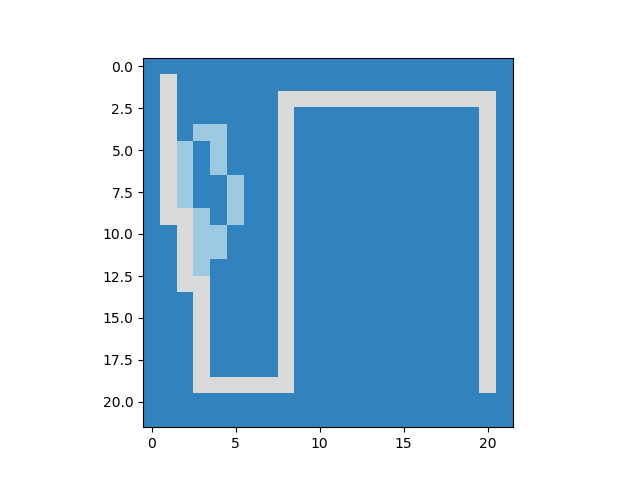

Found path
Found path
Found path
Found path
Found path
Found path


In [47]:
fig = plt.figure()
fig.canvas.draw()
PATH_VALUE = 9

temp_matrix = np.array(matrix, copy=True)

temp_matrix[start] = 7
temp_matrix[goal] = 7
for p in list_point:
    temp_matrix[p] = 8
    
plt.imshow(temp_matrix, cmap="tab20c")
fig.canvas.draw()
plt.pause(0.1)
plt.show()

for i in range(len(temp_listpoint) - 1):
    path_finder = BFS(temp_listpoint[arr_shortest_order[i]], temp_listpoint[arr_shortest_order[i + 1]])
    path = path_finder.search(matrix)

    if path:
        print("Found path")
        for pos in path:
            temp_matrix[pos] = PATH_VALUE
            plt.imshow(temp_matrix, cmap="tab20c")
            fig.canvas.draw()
            plt.pause(0.1)
            plt.show()
    else:
        print("Not found path")


In [20]:
print(temp_listpoint)

[(1, 1), (5, 1), (2, 8), (9, 8), (19, 3), (2, 20), (19, 20)]
